In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !
import matplotlib


In [2]:
dir_base = './'
dir_plot = '/emcee_plot/model_files/'
dir_mods = 'LC_RV_model01/'

filename = 'LC_RV_model01_plot'

plot_properties = {
    'x_limits': [-4.20, 4.20],
    'y_limits': None,
    'y_residual_limits': None
}

font_label = 12
dot_size = 50

#csfont = {'fontname':'Times New Roman'}
#matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rcParams.update({'font.size': font_label})

planet_list = ['b']
transit_time = 1708.99823
period = 3.6600284


In [3]:
def plot_2_panels():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(2,1, height_ratios=[3.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False)
    ax_1.ticklabel_format(useOffset=False)
    return ax_0, ax_1


def plot_3_panels():
    # Partially taken from here:
    # http://www.sc.eso.org/~bdias/pycoffee/codes/20160407/gridspec_demo.html
    
    gs = gridspec.GridSpec(3,1, height_ratios=[2.0,2.0,1.0])
    # Also make sure the margins and spacing are apropriate
    gs.update(left=0.2, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
    
    ax_0 = plt.subplot(gs[0])
    ax_1 = plt.subplot(gs[1])
    ax_2 = plt.subplot(gs[2])

    # Adding minor ticks only to x axis
    from matplotlib.ticker import AutoMinorLocator
    minorLocator = AutoMinorLocator()
    ax_0.xaxis.set_minor_locator(minorLocator)
    ax_1.xaxis.set_minor_locator(minorLocator)
    ax_2.xaxis.set_minor_locator(minorLocator)

    # Disabling the offset on top of the plot
    ax_0.ticklabel_format(useOffset=False)
    ax_1.ticklabel_format(useOffset=False)
    ax_2.ticklabel_format(useOffset=False)
    return ax_0, ax_1, ax_2

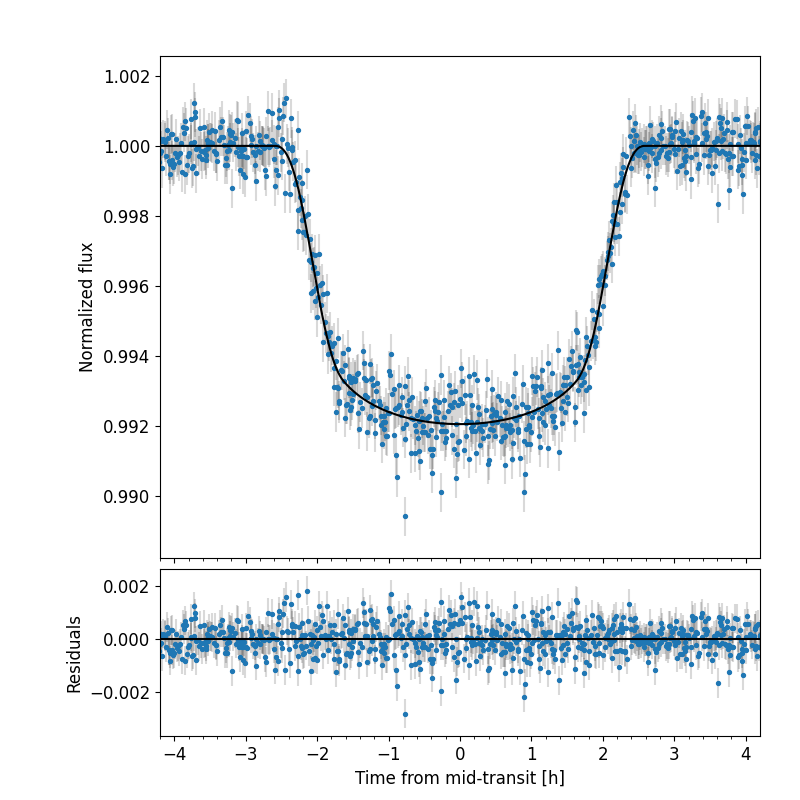

In [4]:
data_label = 'LCdata_TESS'
data_name = 'lc_model_tess'

plot_properties = {
    'x_limits': [-4.20, 4.20],
    'y_limits': None,
    'y_residual_limits': None
}


fig = plt.figure(figsize=(8,8))
ax_0, ax_1 = plot_2_panels()

#LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_oversampled.dat', skip_header=1)

t0_hours = LC_modb[:,1]*24.
full_t0_hours = LC_modb_full[:,0]*24.

LC_modb_err = np.sqrt(LC_modb[:,9]**2+LC_modb[:,12]**2)


ax_0.errorbar(t0_hours, LC_modb[:,8]+1., yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(t0_hours, LC_modb[:,8]+1. , c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

ax_0.plot(full_t0_hours,LC_modb_full[:,1]+1.0, color='k', linestyle='-', zorder=2)


ax_1.errorbar(t0_hours, LC_modb[:,10], yerr=LC_modb_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_1.scatter(t0_hours, LC_modb[:,10], c='C0', s=8, zorder=2)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_1.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')



if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_1.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_xlabel('Time from mid-transit [h]')
ax_1.set_ylabel('Residuals')
plt.savefig(filename+'_TESS.pdf', dpi=300, bbox_inches='tight')

#fileout = open(filename+'_TESS_data.dat', 'w')
#fileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')
#for bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):
#    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))
#fileout.close()


#fileout = open(filename+'_TESS_model.dat', 'w')
#fileout.write('# phase_hours 1   model 2 \n')
#for bb, ph in zip(full_t0_hours, LC_modb_full[:,1]+1.0):
#    fileout.write('{0:15f} {1:15f}  {1:15f}  0.0000 \n'.format( bb, ph))
#fileout.close()



"\nfileout = open(filename+'_ASIAGO_data.dat', 'w')\nfileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')\nfor bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))\nfileout.close()\n\n\nfileout = open(filename+'_ASIAGO_model.dat', 'w')\nfileout.write('# phase_hours 1   model 2 \n')\nfor bb, ph in zip(full_t0_hours, LC_modb_full[:,1]+1.0):\n    fileout.write('{0:15f} {1:15f}  {1:15f}  0.0000 \n'.format( bb, ph))\nfileout.close()\n"

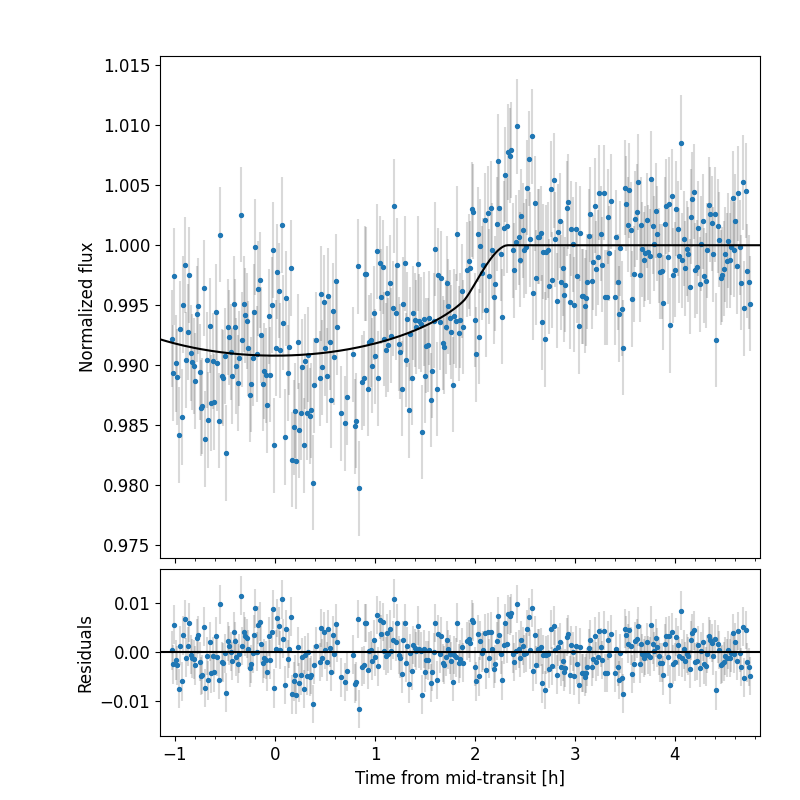

In [5]:
plot_properties = {
    'x_limits': [-1.15, 4.85],
    'y_limits': None,
    'y_residual_limits': None
}


data_label = 'LCdata_ASIAGO'
data_name = 'lc_model_asiago'


fig = plt.figure(figsize=(8,8))
ax_0, ax_1 = plot_2_panels()

#LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_oversampled.dat', skip_header=1)

t0_hours = LC_modb[:,1]*24.
full_t0_hours = LC_modb_full[:,0]*24.

LC_modb_err = np.sqrt(LC_modb[:,9]**2+LC_modb[:,12]**2)


ax_0.errorbar(t0_hours, LC_modb[:,8]+1., yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(t0_hours, LC_modb[:,8]+1. , c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

ax_0.plot(full_t0_hours,LC_modb_full[:,1]+1.0, color='k', linestyle='-', zorder=2)


ax_1.errorbar(t0_hours, LC_modb[:,10], yerr=LC_modb_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_1.scatter(t0_hours, LC_modb[:,10], c='C0', s=8, zorder=2)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_1.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')



if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_1.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_xlabel('Time from mid-transit [h]')
ax_1.set_ylabel('Residuals')
plt.savefig(filename+'_ASIAGO.pdf', dpi=300, bbox_inches='tight')

'''
fileout = open(filename+'_ASIAGO_data.dat', 'w')
fileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')
for bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))
fileout.close()


fileout = open(filename+'_ASIAGO_model.dat', 'w')
fileout.write('# phase_hours 1   model 2 \n')
for bb, ph in zip(full_t0_hours, LC_modb_full[:,1]+1.0):
    fileout.write('{0:15f} {1:15f}  {1:15f}  0.0000 \n'.format( bb, ph))
fileout.close()
'''


0.0026154776077311785 0.0032548421243099607


"\nfileout = open(filename+'_CROW1_data.dat', 'w')\nfileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')\nfor bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))\nfileout.close()\n\nfileout = open(filename+'_CROW1_model.dat', 'w')\nfileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')\nfor bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))\nfileout.close\n"

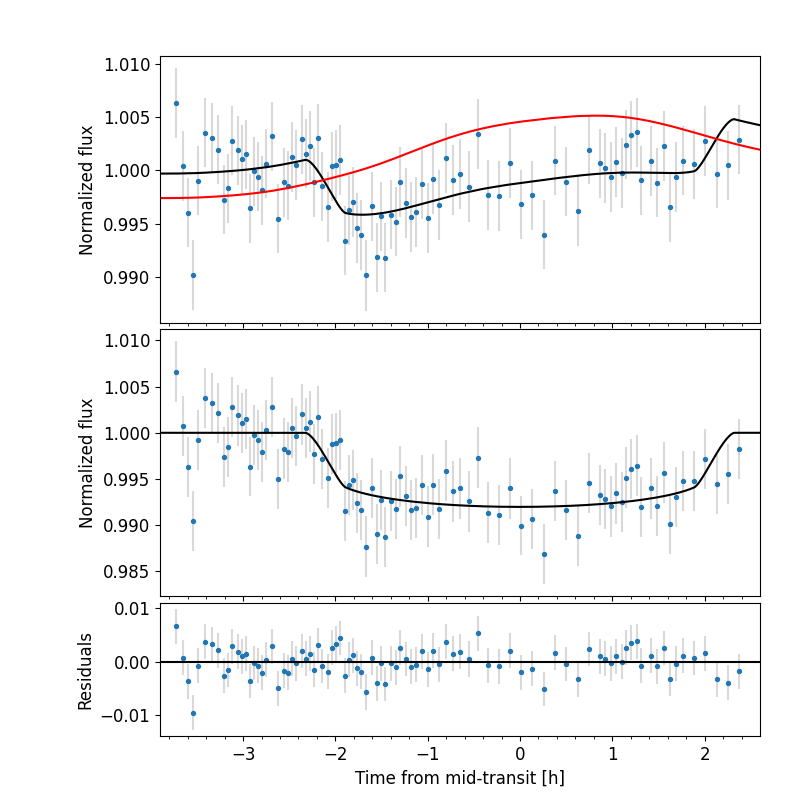

In [6]:
plot_properties = {
    'x_limits': [-3.90, 2.60],
    'y_limits': None,
    'y_residual_limits': None
}



data_label = 'LCdata_CROW1'
data_name = 'lc_model_crow'

matern_model = 'celerite2_matern32_crow'
normalization_model = 'normalization_factor'

fig = plt.figure(figsize=(8,8))
ax_0, ax_1, ax_2 = plot_3_panels()

dataset_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_full.dat', skip_header=1)


LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_oversampled.dat', skip_header=1)

GP_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '_full.dat', skip_header=1)
GP_model = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '.dat', skip_header=1)
#LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
#LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_transit.dat', skip_header=1)

norm_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + normalization_model + '_full.dat', skip_header=1)
norm_model = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + normalization_model + '.dat', skip_header=1)

t0_hours = LC_modb[:,1]*24.
full_t0_hours = LC_modb_full[:,0]*24.



full_model_hours = LC_full[:,1]*24
full_model_curve = GP_full[:,3] + ( LC_full[:,3]+1.0) * norm_full[:,3]


LC_modb_err = np.sqrt(LC_modb[:,9]**2+LC_modb[:,12]**2)


ax_0.errorbar(t0_hours, LC_modb[:,3], yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(t0_hours, LC_modb[:,3], c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

#ax_0.plot(full_model_hours,full_model_curve, color='k', linestyle='-', zorder=2)
ax_0.plot(full_model_hours,dataset_full[:,1], color='k', linestyle='-', zorder=2)
ax_0.plot(full_model_hours,GP_full[:,3]+1., color='r', linestyle='-', zorder=2, label='GP')


ax_1.errorbar(t0_hours, LC_modb[:,8]+1., yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_1.scatter(t0_hours, LC_modb[:,8]+1., c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

#ax_1.plot(full_t0_hours,LC_modb_full[:,1]+1.0, color='k', linestyle='-', zorder=2)
ax_1.plot(full_model_hours, LC_full[:,3]+1.0, color='k', linestyle='-', zorder=2)


ax_2.errorbar(t0_hours, LC_modb[:,10], yerr=LC_modb_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_2.scatter(t0_hours, LC_modb[:,10], c='C0', s=8, zorder=2)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_2.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')


print(np.std(LC_modb[:,10]), np.median(LC_modb_err))



if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_2.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
    ax_1.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_2.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_ylabel('Normalized flux')
ax_2.set_xlabel('Time from mid-transit [h]')
ax_2.set_ylabel('Residuals')
plt.savefig(filename+'_CROW1.pdf', dpi=300, bbox_inches='tight')

'''
fileout = open(filename+'_CROW1_data.dat', 'w')
fileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')
for bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))
fileout.close()

fileout = open(filename+'_CROW1_model.dat', 'w')
fileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')
for bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))
fileout.close
'''



0.002653016530110255 0.003789971635777767


"\nfileout = open(filename+'_CROW2_data.dat', 'w')\nfileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')\nfor bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))\nfileout.close()\n\nfileout = open(filename+'_CROW2_model.dat', 'w')\nfileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')\nfor bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))\nfileout.close\n"

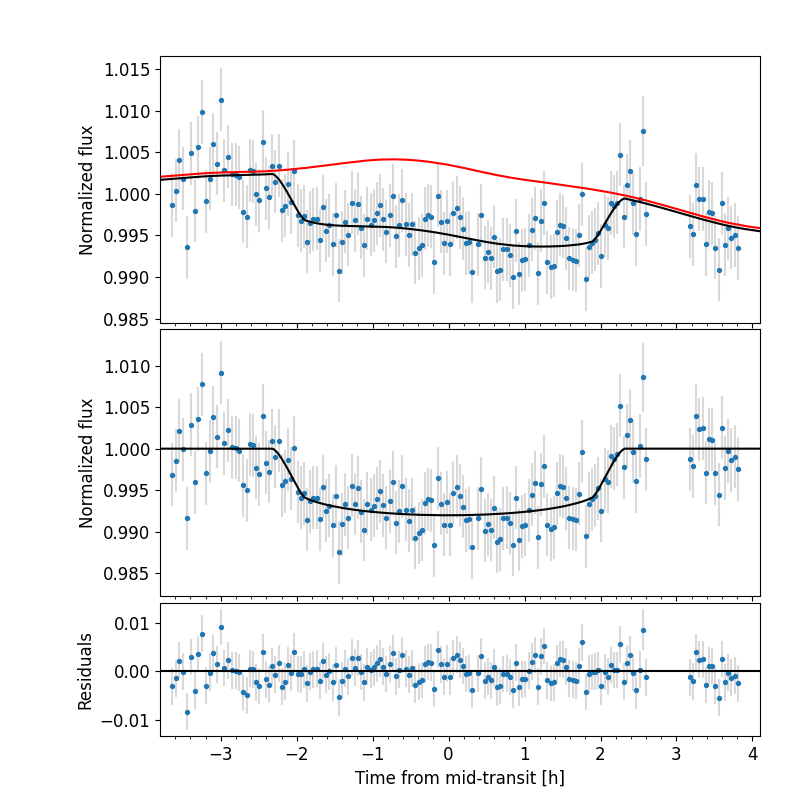

In [7]:
plot_properties = {
    'x_limits': [-3.80, 4.10],
    'y_limits': None,
    'y_residual_limits': None
}


data_label = 'LCdata_CROW2'
data_name = 'lc_model_crow'

matern_model = 'celerite2_matern32_crow'

fig = plt.figure(figsize=(8,8))
ax_0, ax_1, ax_2 = plot_3_panels()

dataset_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_full.dat', skip_header=1)


LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_oversampled.dat', skip_header=1)

GP_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '_full.dat', skip_header=1)
GP_model = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '.dat', skip_header=1)
#LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
#LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_transit.dat', skip_header=1)

t0_hours = LC_modb[:,1]*24.
full_t0_hours = LC_modb_full[:,0]*24.



full_model_hours = LC_full[:,1]*24
full_model_curve = GP_full[:,3] + LC_full[:,3]+1.0


LC_modb_err = np.sqrt(LC_modb[:,9]**2+LC_modb[:,12]**2)


ax_0.errorbar(t0_hours, LC_modb[:,3], yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(t0_hours, LC_modb[:,3], c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

ax_0.plot(full_model_hours,dataset_full[:,1], color='k', linestyle='-', zorder=2)
ax_0.plot(full_model_hours,GP_full[:,3]+1., color='r', linestyle='-', zorder=2, label='GP')


ax_1.errorbar(t0_hours, LC_modb[:,8]+1., yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_1.scatter(t0_hours, LC_modb[:,8]+1., c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

#ax_1.plot(full_t0_hours,LC_modb_full[:,1]+1.0, color='k', linestyle='-', zorder=2)
ax_1.plot(full_model_hours, LC_full[:,3]+1.0, color='k', linestyle='-', zorder=2)


ax_2.errorbar(t0_hours, LC_modb[:,10], yerr=LC_modb_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_2.scatter(t0_hours, LC_modb[:,10], c='C0', s=8, zorder=2)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_2.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')


print(np.std(LC_modb[:,10]), np.median(LC_modb_err))



if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_2.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
    ax_1.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_2.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_ylabel('Normalized flux')
ax_2.set_xlabel('Time from mid-transit [h]')
ax_2.set_ylabel('Residuals')
plt.savefig(filename+'_CROW2.pdf', dpi=300, bbox_inches='tight')

'''
fileout = open(filename+'_CROW2_data.dat', 'w')
fileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')
for bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))
fileout.close()

fileout = open(filename+'_CROW2_model.dat', 'w')
fileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')
for bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))
fileout.close
'''

0.001887654780787147 0.0019701050733399983


"\nfileout = open(filename+'_CROW3_data.dat', 'w')\nfileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')\nfor bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))\nfileout.close()\n\nfileout = open(filename+'_CROW3_model.dat', 'w')\nfileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')\nfor bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):\n    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))\nfileout.close()\n"

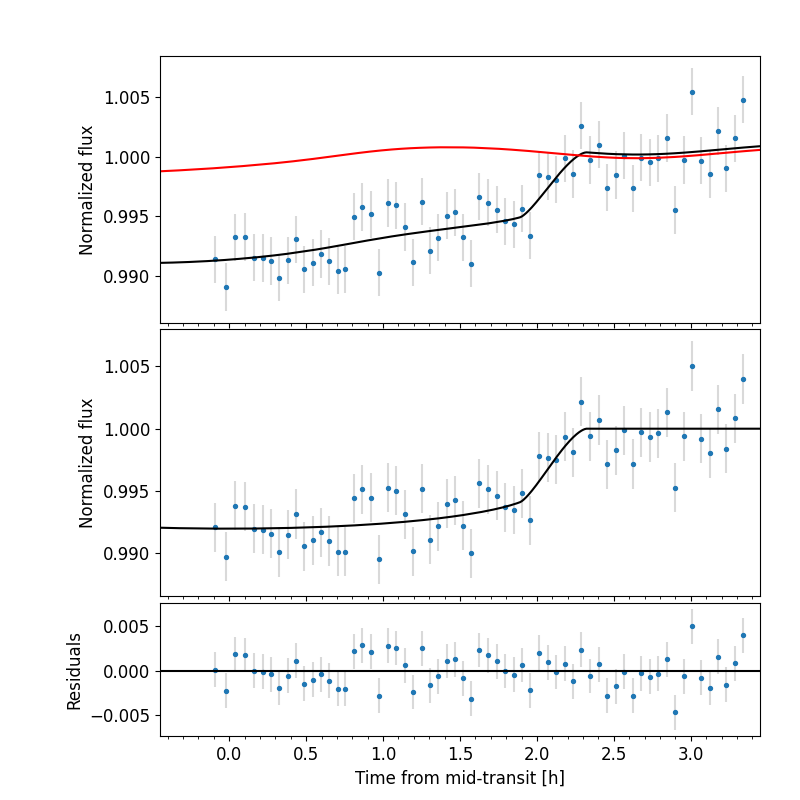

In [8]:
plot_properties = {
    'x_limits': [-0.45, 3.45],
    'y_limits': None,
    'y_residual_limits': None
}



data_label = 'LCdata_CROW3'
data_name = 'lc_model_crow'

matern_model = 'celerite2_matern32_crow'

fig = plt.figure(figsize=(8,8))
ax_0, ax_1, ax_2 = plot_3_panels()

dataset_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_full.dat', skip_header=1)

LC_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_full.dat', skip_header=1)
LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_oversampled.dat', skip_header=1)

GP_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '_full.dat', skip_header=1)
GP_model = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + matern_model + '.dat', skip_header=1)
#LC_modb = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b.dat', skip_header=1)
#LC_modb_full = np.genfromtxt(dir_base + dir_mods + dir_plot + data_label + '_' + data_name + '_b_transit.dat', skip_header=1)

t0_hours = LC_modb[:,1]*24.
full_t0_hours = LC_modb_full[:,0]*24.



full_model_hours = LC_full[:,1]*24
full_model_curve = GP_full[:,3] + LC_full[:,3]+1.0


LC_modb_err = np.sqrt(LC_modb[:,9]**2+LC_modb[:,12]**2)


ax_0.errorbar(t0_hours, LC_modb[:,3], yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_0.scatter(t0_hours, LC_modb[:,3], c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

ax_0.plot(full_model_hours,dataset_full[:,1], color='k', linestyle='-', zorder=2)
ax_0.plot(full_model_hours,GP_full[:,3]+1., color='r', linestyle='-', zorder=2, label='GP')


ax_1.errorbar(t0_hours, LC_modb[:,8]+1., yerr=LC_modb_err, color='black', markersize=0, alpha=0.15, fmt='o', zorder=0)
ax_1.scatter(t0_hours, LC_modb[:,8]+1., c='C0', s=8, zorder=1, label = 'Cadence: 1800s')

#ax_1.plot(full_t0_hours,LC_modb_full[:,1]+1.0, color='k', linestyle='-', zorder=2)
ax_1.plot(full_model_hours, LC_full[:,3]+1.0, color='k', linestyle='-', zorder=2)

ax_2.errorbar(t0_hours, LC_modb[:,10], yerr=LC_modb_err, color='black', markersize=1, alpha=0.15, fmt='o', zorder=1)
ax_2.scatter(t0_hours, LC_modb[:,10], c='C0', s=8, zorder=2)


#ax_0.legend( loc='lower left', fontsize='medium')



ax_2.axhline(0.000, c='k', zorder=3)

#ax_0.legend( loc='lower left', fontsize='medium')


print(np.std(LC_modb[:,10]), np.median(LC_modb_err))



if plot_properties.get('x_limits', False):
    ax_0.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_1.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
    ax_2.set_xlim(plot_properties['x_limits'][0], plot_properties['x_limits'][1])
if plot_properties.get('y_limits', False):
    ax_0.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
    ax_1.set_ylim(plot_properties['y_limits'][0], plot_properties['y_limits'][1])
if plot_properties.get('y_residual_limits', False):
    ax_2.set_ylim(plot_properties['y_residual_limits'][0], plot_properties['y_residual_limits'][1])

#ax_0.tick_params(axis='x', which='minor')
#ax_0.yaxis.set_tick_params(which='minor', right = 'off')
#ax_0.minorticks_on()

#ax_0.set_ylim(0.99957,1.00029)
#ax_1.set_ylim(-0.00026,0.00026)
ax_0.set_ylabel('Normalized flux')
ax_1.set_ylabel('Normalized flux')
ax_2.set_ylabel('Normalized flux')
ax_2.set_xlabel('Time from mid-transit [h]')
ax_2.set_ylabel('Residuals')
plt.savefig(filename+'_CROW3.pdf', dpi=300, bbox_inches='tight')

'''
fileout = open(filename+'_CROW3_data.dat', 'w')
fileout.write('#tbjd 1   phase_hours 2   obs 3   obs_noGP 4   err 5   err_jit 6   res 7 \n')
for bb, ph, ob, vv, ee, ej, res in zip(LC_modb[:,0], t0_hours, LC_modb[:,3], LC_modb[:,8]+1., LC_modb[:,9], LC_modb_err, LC_modb[:,10]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f} {6:15f}\n'.format( bb, ph, ob, vv, ee, ej, res))
fileout.close()

fileout = open(filename+'_CROW3_model.dat', 'w')
fileout.write('# phase_hours 1   model_full 2   model_transit 3   model_gaussian 4 \n')
for bb, ph, mf, mg in zip(full_model_hours,full_model_curve, LC_full[:,3]+1.0,  GP_full[:,3]):
    fileout.write('{0:15f} {1:15f} {2:15f} {3:15f}\n'.format( bb, ph, mf, mg))
fileout.close()
'''


Planet  b , RV curve folded around the transit time
Folded plot for planet  b  saved to: LC_RV_model01_plot_b_RV_folded.pdf


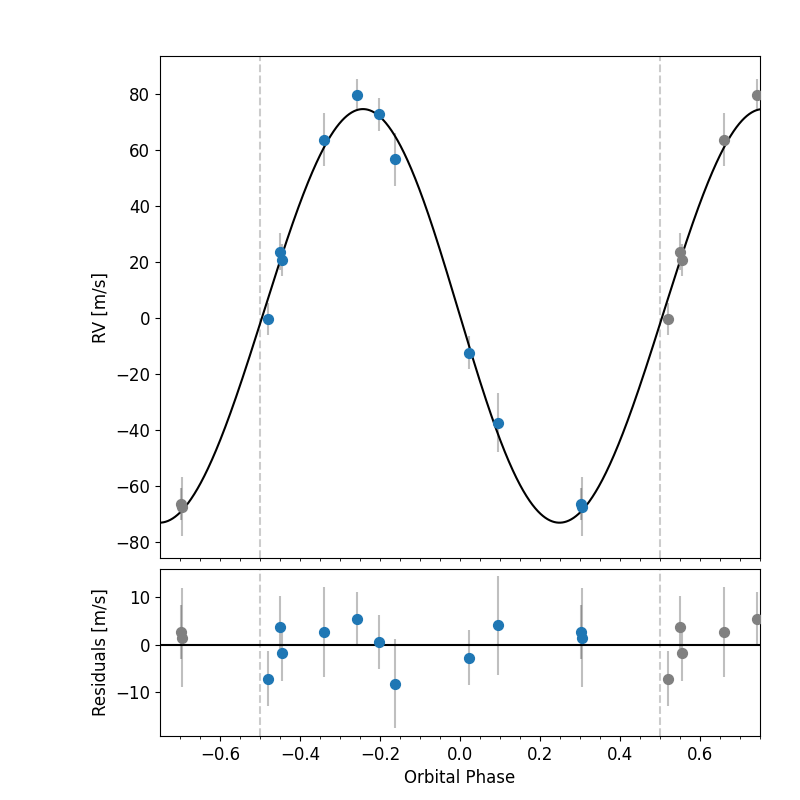

In [9]:
# Folder RV plot for each of the planet

font_label = 12
dot_size = 50

#csfont = {'fontname':'Times New Roman'}
#matplotlib.rc('font',**{'family':'serif','serif':['Times New Roman']})
matplotlib.rcParams.update({'font.size': font_label})


planet_dict = collections.OrderedDict()
planet_dict['b'] =  {
    'P': period,
    'Tc': transit_time,
    'limits_folded_x': [-0.75, 0.75],
    #'limits_folded_y': [-67.8, 67.8],
    #'limits_residuals_y': [-5.5, 5.5],
    'transit_folded': True
}

#planet_dict['c'] =  {
#    'P': 3.434320,
#    'Tc': 8136.045726,
#    'limits_folded_x': [-0.25, 1.25],
#    'limits_folded_y': [-11.0, 7.0],
#    'limits_residuals_y': [-5.5, 5.5],
#    'transit_folded': False
#}

full_dict = {
    'reference_planet': 'b',
    'limits_full_x': [-0.75, 0.75],
    #'limits_full_y': [-69.0, 69.0],
    #'limits_residuals_y': [-5.5, 5.5],
}

n_figure = 10
for key_name, key_val in planet_dict.items():
    RV_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_full.dat', skip_header=1)
    RV_mod = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'.dat', skip_header=1)
    RV_mod_full = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RVdata_HARPN_radial_velocities_'+key_name+'_full.dat', skip_header=1)
    RV_kep = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_kep.dat', skip_header=1)
    RV_pha = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_pha.dat', skip_header=1)
    RV_Tcf = np.genfromtxt(dir_base + dir_mods + dir_plot + 'RV_planet_'+key_name+'_Tcf.dat', skip_header=1)


    RV_mod_err = np.sqrt(RV_mod[:,9]**2+RV_mod[:,12]**2)
    

    fig = plt.figure(figsize=(8,8))

    ax_0, ax_1 = plot_2_panels()
    default_color = 'C' + repr(n_figure)
    
    
    if key_val.get('transit_folded',False):
        rv_phase = RV_mod[:,1] / planet_dict['b']['P']
        print('Planet ',key_name,', RV curve folded around the transit time')
        # Plot of the model
        #ax_0.plot(RV_Tcf[:,0]-1,RV_Tcf[:,1], color='k', linestyle='-', zorder=2)
        ax_0.plot(RV_Tcf[:,0],RV_Tcf[:,1], color='k', linestyle='-', zorder=2)
    else:
        rv_phase = RV_mod[:,2]
        print('Planet ',key_name,', RV curve folded around the reference time')
        # Plot of the model
        ax_0.plot(RV_pha[:,0]-1,RV_pha[:,1], color='k', linestyle='-', zorder=2)
        ax_0.plot(RV_pha[:,0]+1,RV_pha[:,1], color='k', linestyle='-', zorder=2)
    
    
    
    
    ax_0.errorbar(rv_phase, RV_mod[:,8], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(rv_phase, RV_mod[:,8], c=default_color, s=dot_size, zorder=5, label = 'First transit')
    
    # Adding points at phase-1
    ax_0.errorbar(rv_phase-1, RV_mod[:,8], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(rv_phase-1, RV_mod[:,8], c='gray', s=dot_size, zorder=10, label = 'First transit')

    # Adding points at phase+1
    ax_0.errorbar(rv_phase+1, RV_mod[:,8], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=0)
    ax_0.scatter(rv_phase+1, RV_mod[:,8], c='gray', s=dot_size, zorder=10, label = 'First transit')


    # plot of the residuals
    ax_1.errorbar(rv_phase, RV_mod[:,10], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(rv_phase, RV_mod[:,10], c=default_color, s=dot_size, zorder=10)

    # Adding points at phase-1
    ax_1.errorbar(rv_phase-1, RV_mod[:,10], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(rv_phase-1, RV_mod[:,10], c='gray', s=dot_size, zorder=10)

    # Adding points at phase+1
    ax_1.errorbar(rv_phase+1, RV_mod[:,10], yerr=RV_mod_err, color='black', markersize=0, alpha=0.25, fmt='o', zorder=1)
    ax_1.scatter(rv_phase+1, RV_mod[:,10], c='gray', s=dot_size, zorder=10)

    ax_1.axhline(0.000, c='k', zorder=3)
        
    if key_val.get('limits_folded_x', False):
        ax_0.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
        ax_1.set_xlim(key_val['limits_folded_x'][0], key_val['limits_folded_x'][1])
    if key_val.get('limits_folded_y', False):
        ax_0.set_ylim(key_val['limits_folded_y'][0], key_val['limits_folded_y'][1])
    if key_val.get('limits_residuals_y', False):
        ax_1.set_ylim(key_val['limits_residuals_y'][0], key_val['limits_residuals_y'][1])

        
    ax_0.axvline(-0.5, color='k', alpha=0.2, ls='--')
    ax_0.axvline( 0.5, color='k', alpha=0.2, ls='--')

    ax_1.axvline(-0.5, color='k', alpha=0.2, ls='--')
    ax_1.axvline( 0.5, color='k', alpha=0.2, ls='--')
    
    ax_0.axes.get_xaxis().set_ticks([])
    
    ax_0.set_ylabel('RV [m/s]')
    ax_1.set_xlabel('Orbital Phase')
    ax_1.set_ylabel('Residuals [m/s]')
    plot_filename = filename+'_'+key_name+'_RV_folded.pdf'
    print('Folded plot for planet ',key_name,' saved to:', plot_filename )
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    n_figure += 1

    '''
    fileout = open(filename+'_RV_data.dat', 'w')
    fileout.write('#bjd 1   phase 2   obs 3   err 4   err_jit 5   res 6 \n')
    for bb, ph, ob, ee, ej, res in zip( RV_mod[:,0], rv_phase, RV_mod[:,8], RV_mod[:,9], RV_mod_err, RV_mod[:,10]):
        fileout.write('{0:15f} {1:15f} {2:15f} {3:15f} {4:15f} {5:15f}\n'.format( bb, ph, ob, ee, ej, res))
    fileout.close()
    
    fileout = open(filename+'_RV_model.dat', 'w')
    fileout.write('# phase 1   model 2  \n')
    for ph, tc in zip(RV_Tcf[:,0],RV_Tcf[:,1]):
        fileout.write('{0:15f} {1:15f}\n'.format(ph, tc))
    fileout.close()
    '''
    